In [112]:
import math
import tensorflow as tf
from random import random, choice
import numpy
import numpy as np
import numpy.matlib
from matplotlib import cm


import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
def foo(x):
    return 1 - 1/(1 + math.exp(-x))

In [3]:
def makeTraining(n = 1000):

    trainingData = []
    trainingLabels = []
    

    for i in range(n):
        
        x = random() * choice([6, -6])
            
        trainingData.append([x])
        trainingLabels.append([foo(x)])
                

    return trainingData, trainingLabels

In [161]:
x = tf.placeholder(tf.float32, [None, 1]) #input 28x28 array of pixels

W = []
b = []

depth = 5
for i in range(depth):
    W.append(tf.Variable(tf.random_uniform([1,1])))
    b.append(tf.Variable(tf.random_uniform([1,1])))

    
a = x
for i in range(depth):
    a = tf.nn.relu(tf.add(tf.multiply(a,W[i]),b[i]))


y = a

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 1]) #true output


to_minimize = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y_, y))))
train_step = tf.train.GradientDescentOptimizer(0.25).minimize(to_minimize)

sess = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Train

for i in range(10001):
    batch_xs, batch_ys = makeTraining()
    _ , acc, weights = sess.run([train_step, to_minimize, W], feed_dict={x: batch_xs, y_: batch_ys})
    if i % 1000 == 0:
        print "accuracy on trial", i, ":", acc
        print " weights on trial", i, ":", np.array(weights).squeeze()
        print " product of weights:", np.prod(np.array(weights).squeeze())
        print 


accuracy on trial 0 : 1.03016
 weights on trial 0 : [ 0.68780243  0.54595912  0.41497281 -0.09878224  0.70511323]
 product of weights: -0.0108538

accuracy on trial 1000 : 0.291029
 weights on trial 1000 : [ 0.64323962  1.06750166  0.82459855 -0.6302678   0.73105443]
 product of weights: -0.260891

accuracy on trial 2000 : 0.135455
 weights on trial 2000 : [ 0.64863223  1.06679285  0.8206743  -0.62188029  0.72423124]
 product of weights: -0.255761

accuracy on trial 3000 : 0.315359
 weights on trial 3000 : [ 0.67281467  1.04836679  0.80307531 -0.60323846  0.8580969 ]
 product of weights: -0.293218

accuracy on trial 4000 : 0.107867
 weights on trial 4000 : [ 0.64661622  1.05428362  0.81471682 -0.61913425  0.71487099]
 product of weights: -0.245823

accuracy on trial 5000 : 0.35214
 weights on trial 5000 : [ 0.63880783  1.0641731   0.82312679 -0.62993854  0.75645864]
 product of weights: -0.266645

accuracy on trial 6000 : 0.0717305
 weights on trial 6000 : [ 0.64592063  1.04063153  0.7

# Prediction

In [164]:
grid = 100

inputs = numpy.linspace(-6, 6, grid)

a = inputs
for i in range(depth):
    Wmat = np.matlib.repmat(W[i].eval(), 1, grid)
    bmat = np.matlib.repmat(b[i].eval(), 1, grid)
    
    a = tf.nn.relu(tf.add(tf.multiply(a,Wmat),bmat))
    
    
# initialize plot

%matplotlib notebook



<IPython.core.display.Javascript object>


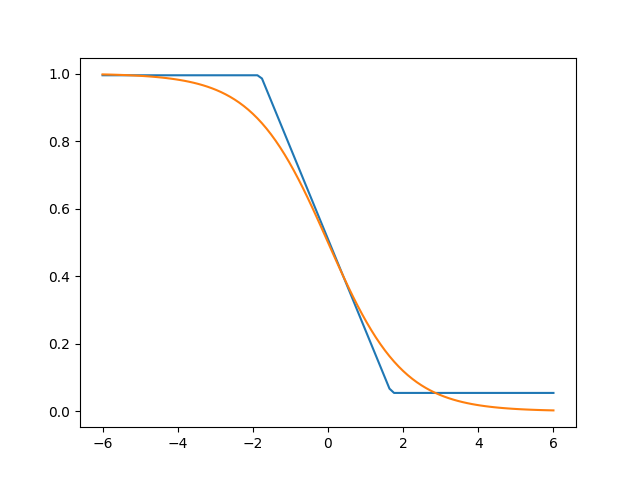

In [165]:
plt.plot(inputs, a.eval().squeeze())
plt.plot(inputs,[foo(x) for x in inputs])

# Optimization Surface

## 2 Layers

In [64]:
grid = 50

xs, ys = numpy.meshgrid(numpy.linspace(-1, 1, grid), numpy.linspace(-1, 1, grid))

# for every set of weights - calculate average loss
inputs, outputs = makeTraining()
inputs = np.array(inputs).squeeze()
outputs = np.array(outputs).squeeze()
colors = np.zeros((grid,grid))
for i in range(grid):
    for j in range(grid):
        w1 = xs[i][j]
        w2 = ys[i][j]
        predictions = [max(max(w1*in_, 0)*w2, 0) for in_ in inputs]
        
        loss = math.sqrt(np.mean([math.pow(outputs[k] - predictions[k], 2) for k in range(len(inputs))]))
        colors[i][j] = math.log(loss,2)


<IPython.core.display.Javascript object>


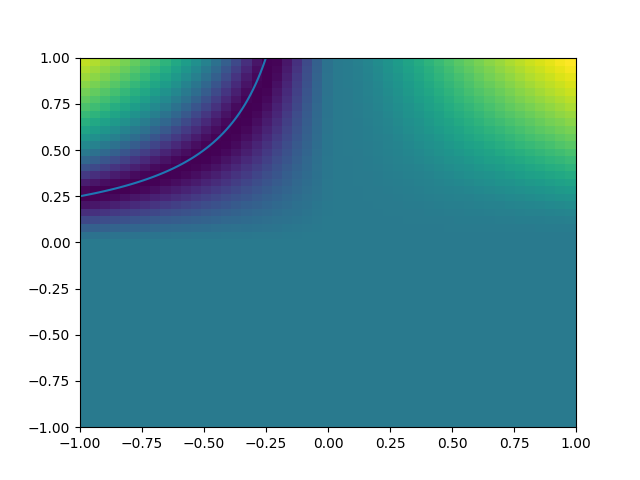

In [68]:
        
%matplotlib notebook
fig = plt.figure()

In [69]:

hyp_xs = np.linspace(-1, -.25, 100)
hyp_ys = [-0.25/x for x in hyp_xs]
plt.plot(hyp_xs, hyp_ys)

plt.pcolor(xs, ys, colors, edgecolors='none')
plt.show()


## 3 Layers

In [148]:
grid = 20
xs, ys, zs = numpy.meshgrid(numpy.linspace(-.5, .5, grid), numpy.linspace(-.5, .5, grid), numpy.linspace(-.5, .5, grid))
# for every set of weights - calculate average loss
inputs, outputs = makeTraining()
inputs = np.array(inputs).squeeze()
outputs = np.array(outputs).squeeze()

losses = np.zeros((grid,grid,grid))
for i in range(grid):
    for j in range(grid):
        for k in range(grid):
            w1 = xs[i][j][k]
            w2 = ys[i][j][k]
            w3 = zs[i][j][k]
            predictions = [max(max(max(w1*in_, 0)*w2, 0)*w3, 0) for in_ in inputs]
            loss = math.sqrt(np.mean([math.pow(outputs[m] - predictions[m], 2) for m in range(len(inputs))]))
            losses[i][j][k]=loss



<IPython.core.display.Javascript object>


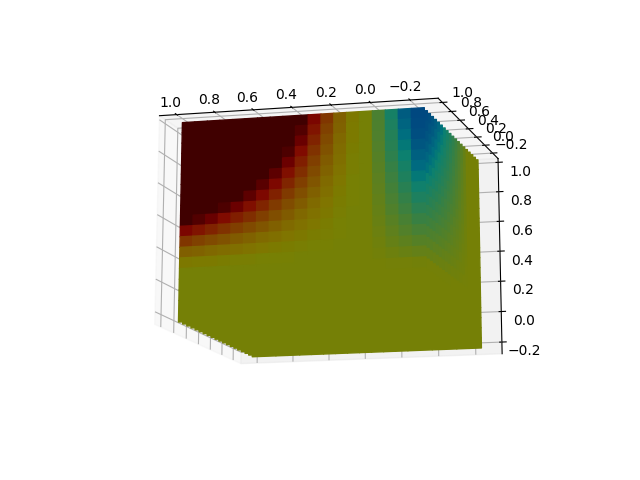

In [146]:
%matplotlib notebook
fig2 = plt.figure()

In [147]:
ax2 = fig2.add_subplot(111, projection='3d')
for i in range(grid):
    ax2.plot_surface(xs[i], ys[i], zs[i], facecolors=cm.jet(losses[i]), edgecolors='none')
